### This dataset contains information on the bookings of individuals in a fitness club in Canada
#### After necessary data cleaning/transformation, and exploratory data analysis, a machine learning model will be created to predict how particular feature variables can be used to predict booking attendance

In [107]:
# Dataset: Fitness Club Dataset by DEE DEE
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/pc/OneDrive/Documents/Jupyter Projects/fitness_class_2212.csv")
pd.set_option('display.max_columns', None)
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


#### Each row represents an individuals booking and their details

In [108]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
booking_id,int64,1500,0,0.000000,1500
months_as_member,int64,1500,0,0.000000,72
weight,float64,1480,20,1.333333,1241
days_before,object,1500,0,0.000000,31
day_of_week,object,1500,0,0.000000,10
time,object,1500,0,0.000000,2
category,object,1500,0,0.000000,6
attended,int64,1500,0,0.000000,2


# 1. Cleaning and Transformation

### Weight
#### The weight column has 20 missing values, we will fill those missing values with the average weight of the dataset

In [109]:
data['weight'] = data['weight'].fillna(data['weight'].mean())
print(data['weight'].isna().sum())

0


### Days before
#### The days_before column contains a mix of integers and strings, we'll convert the column to exclusively integers

In [110]:
print(data['days_before'].unique())

['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']


In [111]:
data['days_before'] = data['days_before'].str.replace(' days', '')
data['days_before'] = data['days_before'].astype('int64')
print(data['days_before'].unique())
print(data['days_before'].dtype)

[ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]
int64


### Day of the week
#### The values in the day_of_week column are all in different formats, we'll convert them to the same format

In [112]:
print(data['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']


In [113]:
data['day_of_week'] = data['day_of_week'].str.replace('nesday', '')
data['day_of_week'] = data['day_of_week'].str.replace('day', '')
data['day_of_week'] = data['day_of_week'].str.replace('.', '')

print(data['day_of_week'].unique())

data['day_of_week'] = data['day_of_week'].astype('category')
data['day_of_week'] = data['day_of_week'].cat.set_categories(new_categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

print(data['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']


### Category
#### The category column has an unusual entry, we will replace it with unknown

In [114]:
print(data['category'].unique())

['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [115]:
data['category'] = data['category'].str.replace('-', 'Unknown')
print(data['category'].unique())

['Strength' 'HIIT' 'Cycling' 'Yoga' 'Unknown' 'Aqua']


# 2. Exploratory Data Analysis

## 2.1 Visualize attendance of bookings made

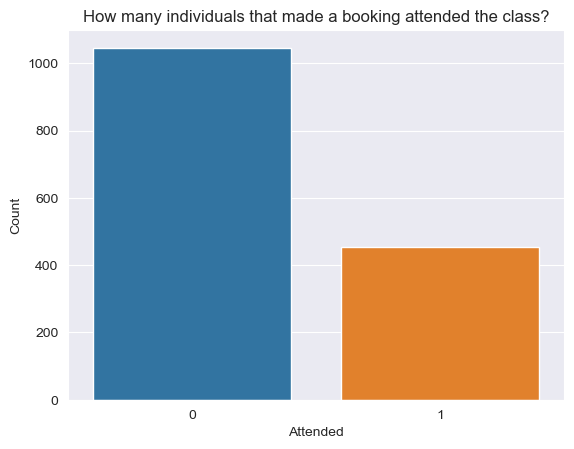

In [116]:
sns.set_style('darkgrid')
sns.countplot(x='attended', data=data)
plt.xlabel('Attended')
plt.ylabel('Count')
plt.title('How many individuals that made a booking attended the class?')
plt.show()

#### The majority of individuals that made a booking did not attend the class

## 2.2 Visualize the distribution of months as member

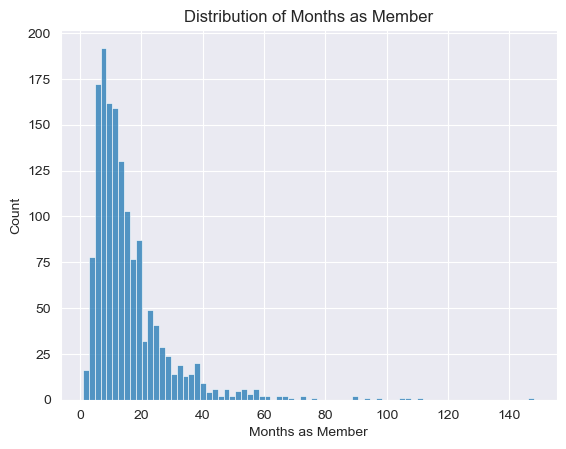

In [117]:
sns.histplot(x='months_as_member', data=data)
plt.title('Distribution of Months as Member')
plt.xlabel('Months as Member')
plt.show()

#### The histogram of months as member appears to have outliers above 80 months heavily skewing the data and making it difficutl to interpret the distribution

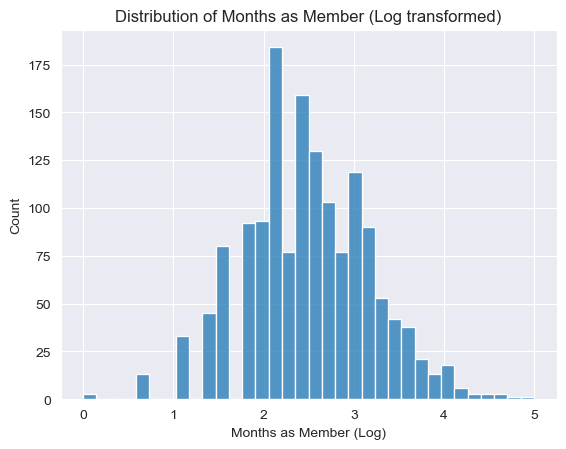

In [118]:
data['log_months_as_member'] = np.log(data['months_as_member'])
sns.histplot(x='log_months_as_member', data=data)
plt.title('Distribution of Months as Member (Log transformed)')
plt.xlabel('Months as Member (Log)')
plt.show()

#### Applying a log transformation, the distribution of months as member appears to follow a normal distribution

## 2.3 What does the distribution of months as members look like for individuals who attended the class and those who didn't

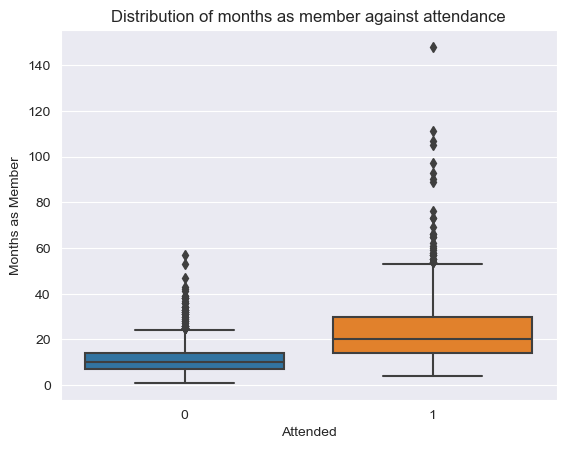

In [119]:
sns.boxplot(x='attended', y='months_as_member', data=data)
plt.xlabel('Attended')
plt.ylabel('Months as Member')
plt.title('Distribution of months as member against attendance')
plt.show()

#### Again, the distribution of months as members is highly skewed and the distribution is difficult to interpret...

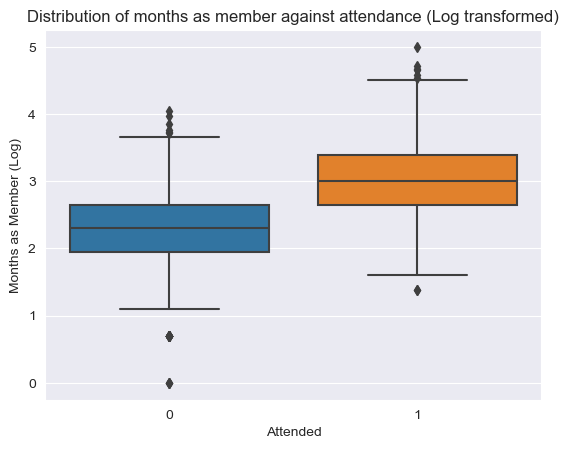

In [120]:
sns.boxplot(x='attended', y='log_months_as_member', data=data)
plt.xlabel('Attended')
plt.ylabel('Months as Member (Log)')
plt.title('Distribution of months as member against attendance (Log transformed)')
plt.show()

#### Applying a log transformation we can see that in general individuals that have been members for longer are more likely to attend the class the booked.

# 3. Machine Learning

In [121]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,log_months_as_member
0,1,17,79.56,8,Wed,PM,Strength,0,2.833213
1,2,10,79.01,2,Mon,AM,HIIT,0,2.302585
2,3,16,74.53,14,Sun,AM,Strength,0,2.772589
3,4,5,86.12,10,Fri,AM,Cycling,0,1.609438
4,5,15,69.29,8,Thu,AM,HIIT,0,2.708050


## 3.1 KNeighborsClassifier model

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numerical
data['day_of_week'] = data['day_of_week'].astype('category')
data['time'] = data['time'].astype('category')
data['category'] = data['category'].astype('category')
data = pd.get_dummies(data)


# Seperate the feature and target variables
X = data.drop(['booking_id', 'log_months_as_member', 'attended'], axis=1)
y = data['attended']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  =scaler.transform(X_test)

In [123]:
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_knn))


0.7244444444444444


#### After fitting our model on our training dataset, the model was able to accurately predict 72% of the target variables on the test set

## 3.2 Using cross validation to find the optimal n_neighbors

#### The model above used an n_neighbor parameter of 5, we'll use cross validation to find the n_neighbor value that returns an optimal accuracy score

In [124]:
from sklearn.model_selection import cross_val_score, KFold

avg_accuracy = {}
neighbors = np.arange(1, 26)

# Create a K-Fold with 5 splits
kf = KFold(n_splits = 5, shuffle=True, random_state=1)

# Iterate over n_neighbor values, apply cross validation to the training set, and calculate the mean accuracy
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    accuracy = cross_val_score(knn, X_train_scaled, y_train, cv=kf)
    avg_accuracy[neighbor] = np.mean(accuracy)
    
print(avg_accuracy)

{1: 0.6828571428571429, 2: 0.720952380952381, 3: 0.700952380952381, 4: 0.7276190476190476, 5: 0.7161904761904762, 6: 0.7371428571428572, 7: 0.7352380952380952, 8: 0.7390476190476191, 9: 0.7342857142857143, 10: 0.741904761904762, 11: 0.740952380952381, 12: 0.7371428571428572, 13: 0.741904761904762, 14: 0.7314285714285715, 15: 0.7361904761904763, 16: 0.7333333333333334, 17: 0.7333333333333334, 18: 0.7285714285714286, 19: 0.7314285714285715, 20: 0.7238095238095237, 21: 0.7266666666666666, 22: 0.7257142857142858, 23: 0.7219047619047618, 24: 0.7247619047619048, 25: 0.7257142857142858}


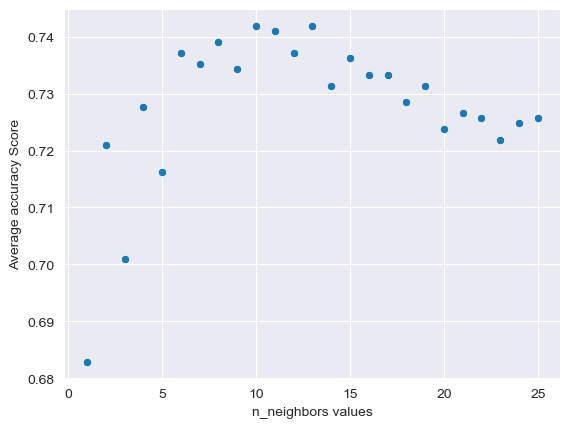

In [125]:
# Plot the mean accuracy for each iteration of the cross validation
sns.scatterplot(x=neighbors, y=avg_accuracy.values())
plt.ylabel('Average accuracy Score')
plt.xlabel('n_neighbors values')
plt.show()

#### From this we can see that a n_neighbor value of either 10 or 13 is the optimal parameter value

## 3.3 Using Grid Search to confirm the optimal n_neighbors

In [126]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1, 26)}
knn_GS = GridSearchCV(knn2, param_grid, cv=kf)
knn_GS.fit(X_train_scaled, y_train)
print(knn_GS.best_params_)
print(knn_GS.best_score_)


{'n_neighbors': 10}
0.741904761904762


#### After more advanced hyperparameter tuning, we can see that the optimal n_neighbor parameter value is 10

## 3.4 Final Evaluation

In [127]:
# Now we apply the optimised paramter value to the model and predict the test set again
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_knn))

0.7377777777777778


#### We can see that the optimised model correctly predicted the test set with a 74% accuracy, 2% better than the previously un-optimized model of 72%

## 3.5 Decision tree classifier

#### We'll compare our previous KNeighborsClassifier model to a DecisionTreeClassifier model to see which one might perform better

In [128]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.1, random_state=1)
dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)

print(accuracy_score(y_pred_dtc, y_test))

0.7466666666666667


#### Applying the default parameters we can see the model already performs slightly better, 75%, than the optimised KNeighborsClassifier model, 74%

In [129]:
# We'll optimise over every iteration of the 'max_depth' and 'min_samples_leaf' parameters
params = {'max_depth' : np.arange(1, 11), 'min_samples_leaf' : (np.arange(1, 11)/10)}

dtc2 = DecisionTreeClassifier()
dtc_GS = GridSearchCV(dtc2, params, cv=kf)
dtc_GS.fit(X_train_scaled, y_train)
print(dtc_GS.best_params_)
print(dtc_GS.best_score_)

{'max_depth': 3, 'min_samples_leaf': 0.1}
0.7819047619047618


#### The optimised paramteres for 'max_depth' and 'min_samples_leaf' are 3 and 0.1 respectively 

In [130]:
dtc = DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.1, random_state=1)
dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)

print(accuracy_score(y_pred_dtc, y_test))

0.7733333333333333


#### The optimised DecisionTreeClassifier performs much better, having an accuracy of 78%, than the optimised KNeighborsClassifier model at just 74%